# DBSCAN Clustering


In [19]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('datasets/fies_df_for_ML.csv')

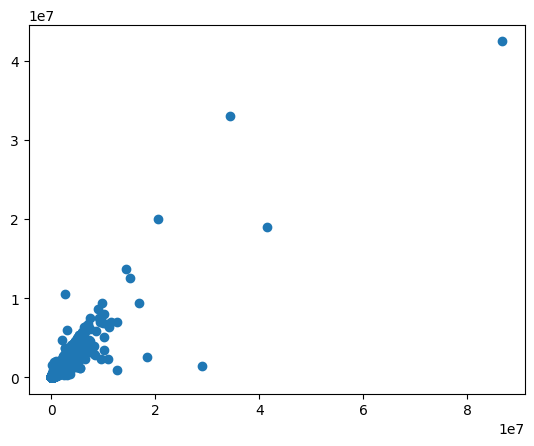

In [20]:
import matplotlib.pyplot as plt
# Scatter plot first
incomes, expenditures = dataset.total_receipts, dataset.total_household_disbursements
plt.scatter(incomes, expenditures)

In [21]:
# Set up epsilons and min_samples
# epsilons = np.linspace(0.01, 1, num=15)
# min_samples = np.arange(2, 20, step=3)
epsilons = np.linspace(0.01, 1, num=8)
print(f'Length of epsilons: {len(epsilons)}')
min_samples = np.arange(2, 20, step=5)
print(f'Length of min_samples: {len(min_samples)}')

Length of epsilons: 8
Length of min_samples: 4


In [22]:
import itertools
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
print(N)

32


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as ss
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    print(f"Index: {i+1}, Epsilon: {eps}, MinSamples: {num_samples}")
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i+1}, Score: {scores[-1]}, Labels: {labels_set}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}



In [24]:
dataset = dataset.sample(50000)
X = dataset[['total_receipts', 'total_household_disbursements']].to_numpy()

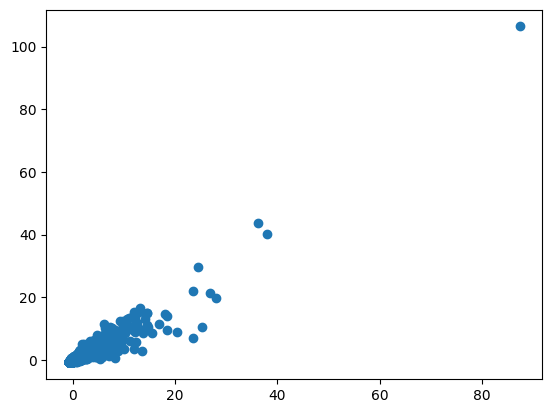

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [26]:
best_dict = get_scores_and_labels(combinations, X_scaled)

Index: 1, Epsilon: 0.01, MinSamples: 2
Combination (0.01, 2) on iteration 1 of 32 has 1295 clusters. Moving on
Index: 2, Epsilon: 0.01, MinSamples: 7
Combination (0.01, 7) on iteration 2 of 32 has 163 clusters. Moving on
Index: 3, Epsilon: 0.01, MinSamples: 12
Combination (0.01, 12) on iteration 3 of 32 has 80 clusters. Moving on
Index: 4, Epsilon: 0.01, MinSamples: 17
Combination (0.01, 17) on iteration 4 of 32 has 63 clusters. Moving on
Index: 5, Epsilon: 0.15142857142857144, MinSamples: 2
Combination (0.15142857142857144, 2) on iteration 5 of 32 has 52 clusters. Moving on
Index: 6, Epsilon: 0.15142857142857144, MinSamples: 7
Index: 5, Score: 0.7350420780876349, Labels: [0 0 0 ... 0 0 0], NumClusters: 7
Index: 7, Epsilon: 0.15142857142857144, MinSamples: 12
Combination (0.15142857142857144, 12) on iteration 7 of 32 has 1 clusters. Moving on
Index: 8, Epsilon: 0.15142857142857144, MinSamples: 17
Combination (0.15142857142857144, 17) on iteration 8 of 32 has 1 clusters. Moving on
Index

In [27]:
best_dict

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.9310830154819352}

In [28]:
import plotly.express as px
fig = px.scatter(x=X_scaled[:, 0], y=X_scaled[:, 1], color=best_dict['best_labels'])
fig.show()